# <b> Rice Classification by Sanjay Patel

## <b>Agenda<b>

### 1. Introduction

- What is the data set?

### 2. Fetching and Cleaning the Data

### 3. Exploratory Data Analysis

- Checking for null values
- Check column types
- Numerical Summary
- Checking for correlation

### 4. Testing Machine Learning Models

- Logistic Regression
- Support Vector Machines
- Naive-Bayes
- Grid Search

### 5. Optimising the models

## <b>1. Introduction</b>

### What is the data set?



## <b>2. Fetching and Cleaning the Data

In [559]:
# import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [560]:
# import and read the csv
rice_csv = pd.read_csv('riceClassification.csv')

In [561]:
# import the data and create the dataframe
df = pd.DataFrame(rice_csv)
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


## <b>3. Exploratory Data Analysis

In [562]:
# drop unnecessary colums
df = df.drop(columns=['id'])

In [563]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [564]:
# get shape of the dataframe
df.shape

(18185, 11)

In [565]:
# check for null values
df.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

<b>Observations</b>

- There are no null values

In [566]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  int64  
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
 10  Class            18185 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.5 MB


<b>Observations</b>

- All the data types are all numerical

In [567]:
# get summary of the data
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


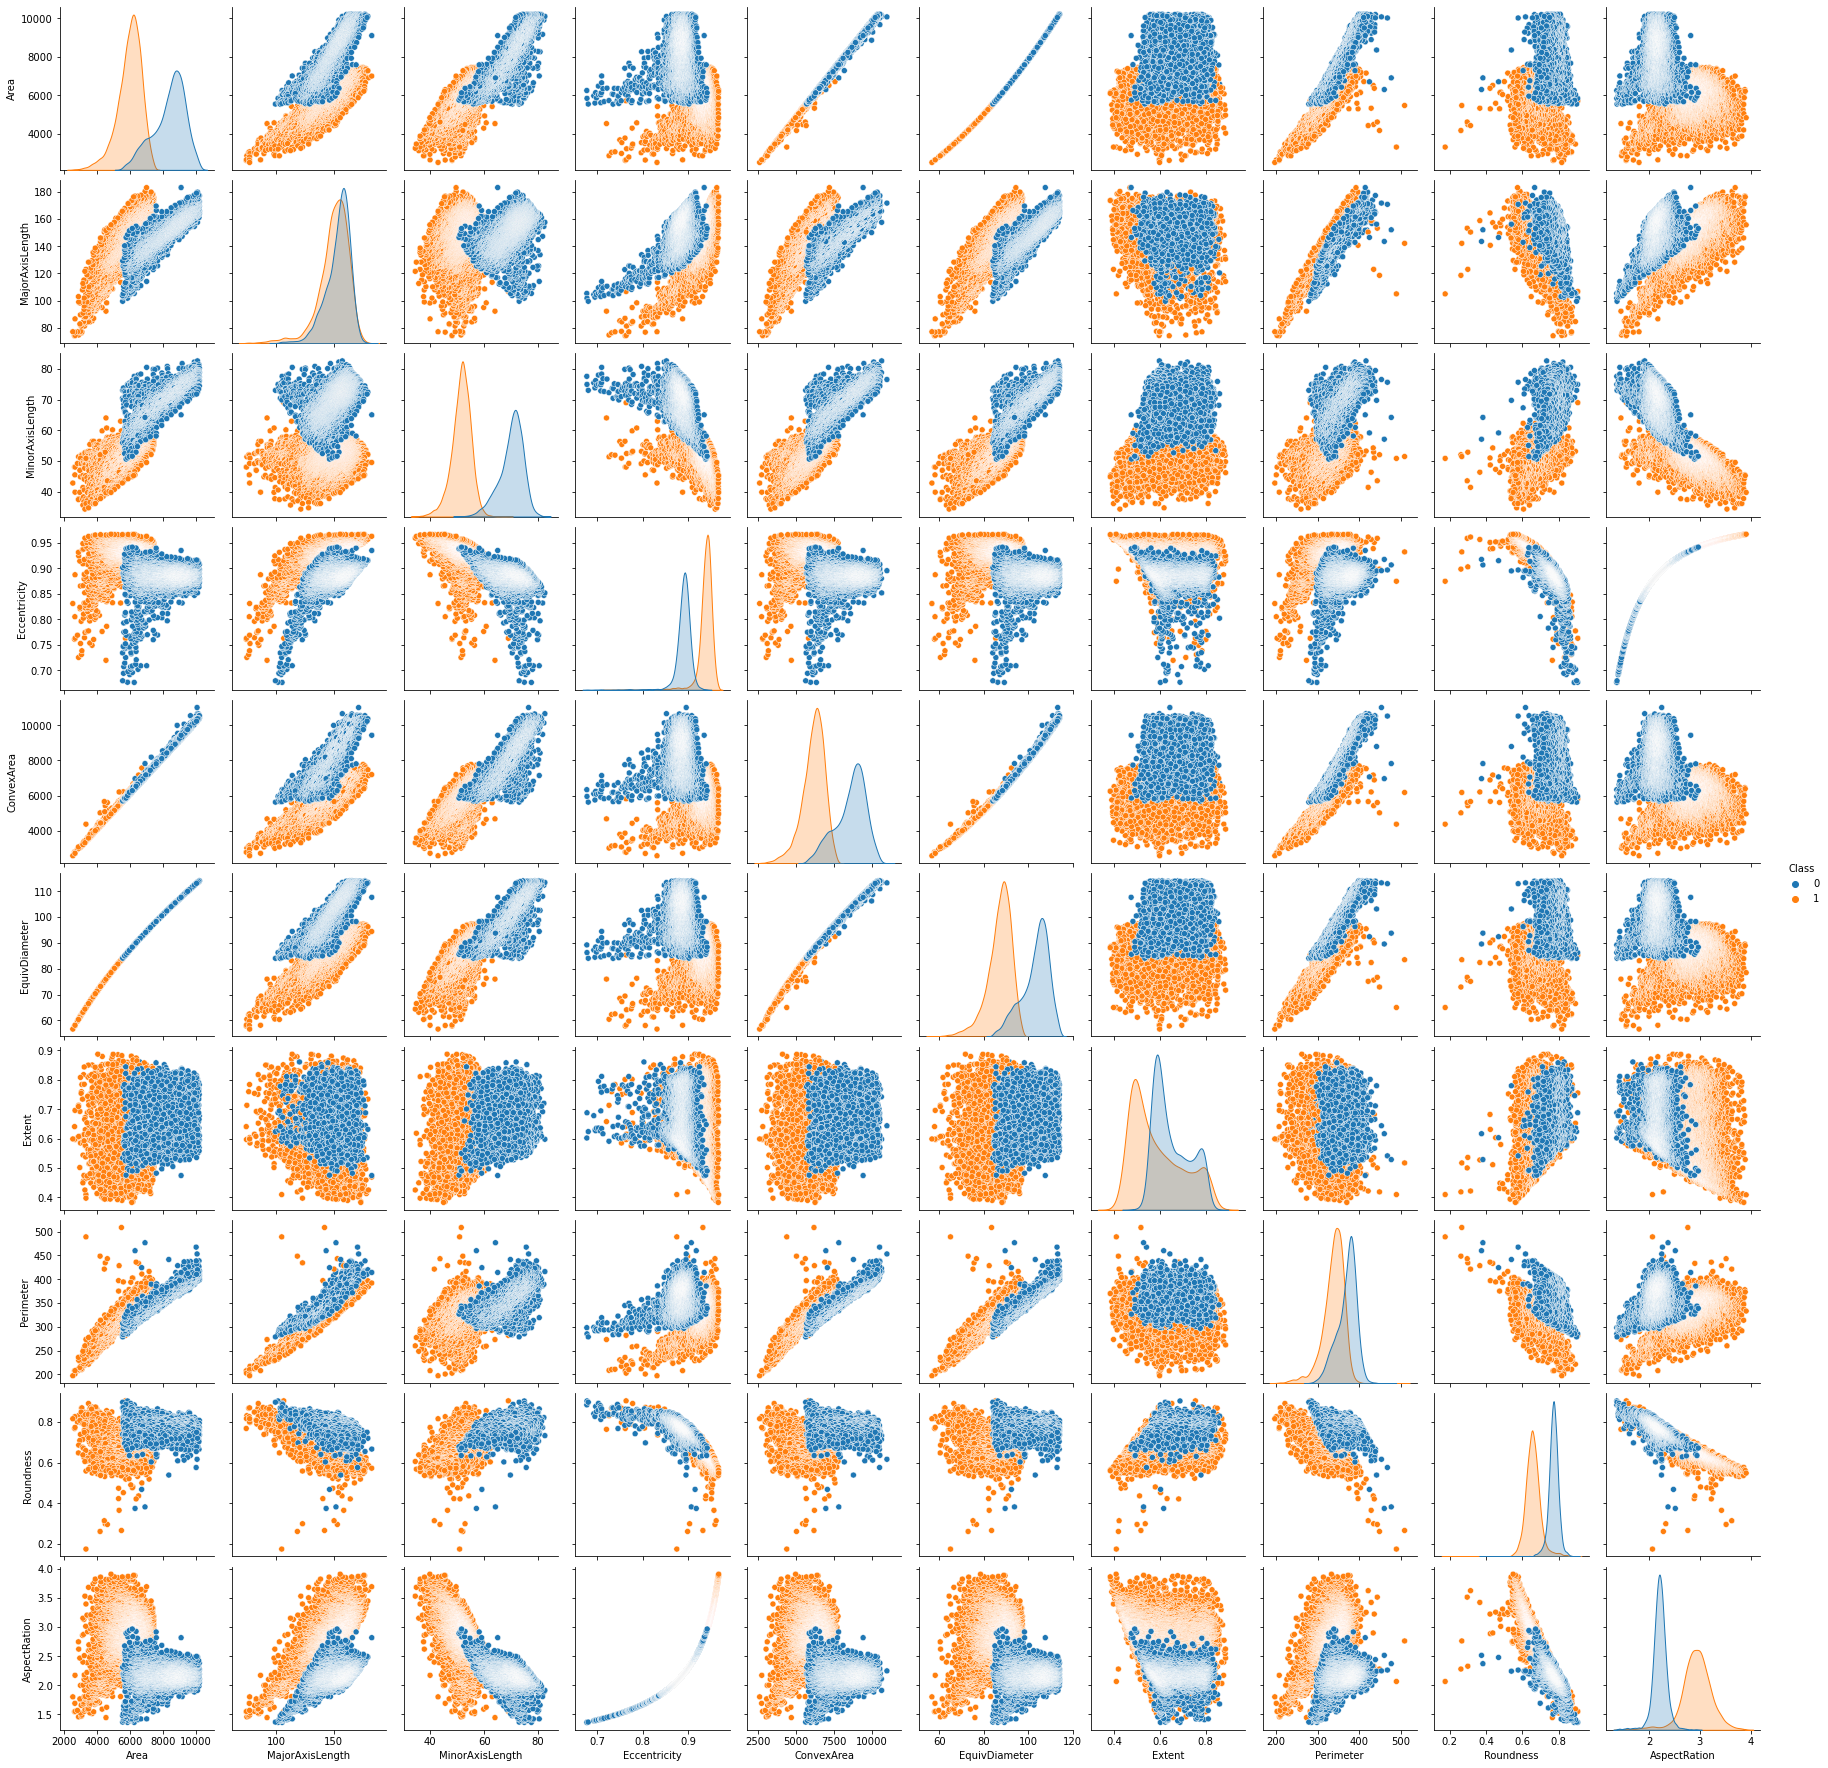

In [630]:
# plot pair plot to get a visual representation of the dataset
sns.pairplot(df, hue='Class')
plt.show()

<b>Observations</b>

- There is correlation between a few of the columns

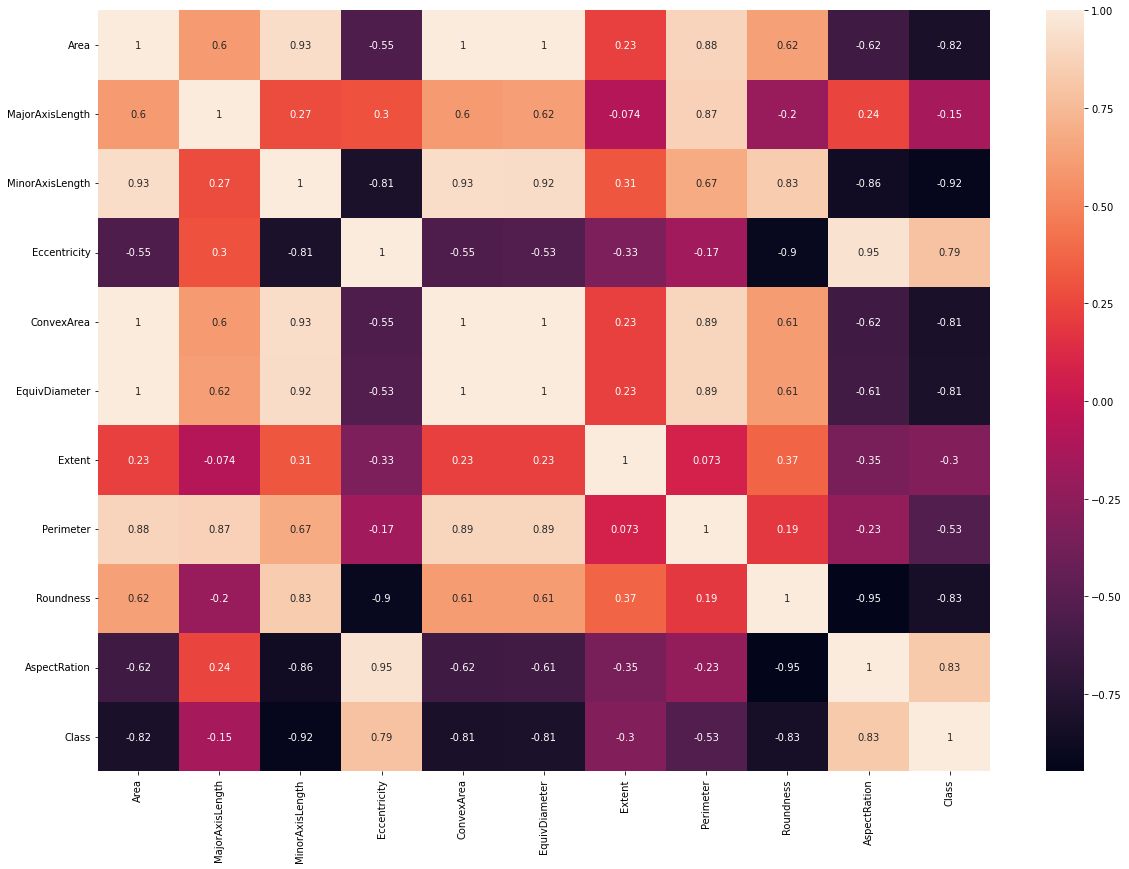

In [569]:
# check for correlations
_ = plt.figure(figsize=(20, 14))
sns.heatmap(df.corr(), annot=True)
plt.show()

<b>Observations</b>

- There is correlation between a few of the columns

# <b>4. Testing Machine Learning Models

## Logistic Regression

In [570]:
# standardise the data frame
scaler = StandardScaler().fit_transform(df.iloc[:, :10])

In [571]:
# set feature and target variables
X = scaler # all features
y = df['Class'] # target

In [572]:
# get training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [573]:
# create logistic regression model and fit the training data
lr_model = LogisticRegression().fit(X_train, y_train)

In [574]:
print('Test score: ', lr_model.score(X_test, y_test))
print('Training score: ', lr_model.score(X_train, y_train))

Test score:  0.9898267803134452
Training score:  0.9890019246631839


<b>Observations</b>

- There is very little difference between the test and training score
- Suggests that the model has done very well and there is no overfitting

In [575]:
# check the weights of each of the columns
lr_model.coef_

array([[-1.06692194,  3.0334558 , -2.1190927 , -2.18137593, -1.97956061,
        -2.37840378,  0.00343352, -1.69357704, -2.70024115,  1.79784274]])

<b>Observations</b>

- There are a few coefficients that are close to zero
- Can look at removing those features to simplify the model

In [576]:
# predict test class
lr_y_pred = lr_model.predict(X_test)

# predicted test probability:
lr_y_pred_probs = lr_model.predict_proba(X_test)[:, 1]

In [577]:
lr_y_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [578]:
lr_y_pred_probs

array([5.79344288e-05, 3.58664206e-01, 9.31511295e-01, ...,
       5.98559705e-06, 9.99958639e-01, 9.99933355e-01])

In [579]:
lr_y_pred_probs

array([5.79344288e-05, 3.58664206e-01, 9.31511295e-01, ...,
       5.98559705e-06, 9.99958639e-01, 9.99933355e-01])

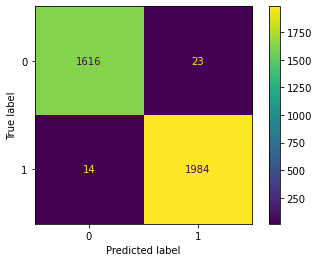

In [580]:
c_matrix = metrics.confusion_matrix(y_test, lr_y_pred)
c_matrix_t = pd.DataFrame(c_matrix)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()

In [581]:
print(metrics.classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1639
           1       0.99      0.99      0.99      1998

    accuracy                           0.99      3637
   macro avg       0.99      0.99      0.99      3637
weighted avg       0.99      0.99      0.99      3637



<b>Observations</b>

- Model did really well without feature selection

## Support Vector Machines

In [582]:
svm_model = svm.SVC().fit(X_train, y_train)

In [583]:
print('Test score: ', svm_model.score(X_test, y_test))
print('Training score: ', svm_model.score(X_train, y_train))

Test score:  0.9909265878471267
Training score:  0.9903766840802859


In [584]:
# predict test class
svm_y_pred = svm_model.predict(X_test)


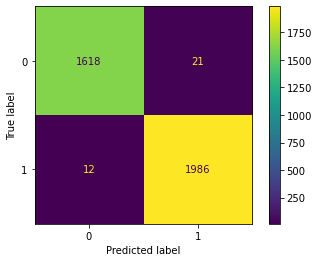

In [585]:
c_matrix = metrics.confusion_matrix(y_test, svm_y_pred)
c_matrix_t = pd.DataFrame(c_matrix)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()

In [586]:
print(metrics.classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1639
           1       0.99      0.99      0.99      1998

    accuracy                           0.99      3637
   macro avg       0.99      0.99      0.99      3637
weighted avg       0.99      0.99      0.99      3637



## Naive-Bayes

In [587]:
nb_model = GaussianNB().fit(X_train, y_train)

In [588]:
print('Test score: ', nb_model.score(X_test, y_test))
print('Training score: ', nb_model.score(X_train, y_train))


Test score:  0.9829529832279351
Training score:  0.9837091009073412


In [589]:
nb_model.score(X_train, y_train)

0.9837091009073412

In [590]:
nb_y_pred = nb_model.predict(X_test)

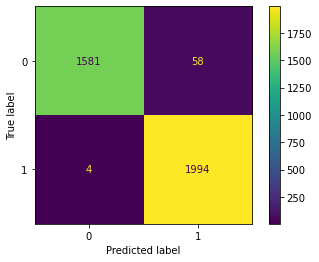

In [591]:
c_matrix = metrics.confusion_matrix(y_test, nb_y_pred)
c_matrix_t = pd.DataFrame(c_matrix)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()

In [592]:
print(metrics.classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1639
           1       0.97      1.00      0.98      1998

    accuracy                           0.98      3637
   macro avg       0.98      0.98      0.98      3637
weighted avg       0.98      0.98      0.98      3637



## Grid Search

In [593]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [0.0001, 0.001, 0.01],
    'solver': ['liblinear']
}

lr_gs = GridSearchCV(LogisticRegression(max_iter=10000), lr_params, cv=5, verbose=1)
lr_gs.fit(X_train, y_train)

# candidates = penalty * C * (2 * 3 = 6 candidates)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.0001, 0.001, 0.01], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             verbose=1)

In [594]:
best_svc = lr_gs.best_estimator_
print(lr_gs.best_params_)
print(lr_gs.best_score_)

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
0.9874207903189415


## Optimising the Models

In [596]:
df_optimise = df.drop(columns=['Area', 'EquivDiameter', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Perimeter', 'AspectRation', 'Class'])

<AxesSubplot:>

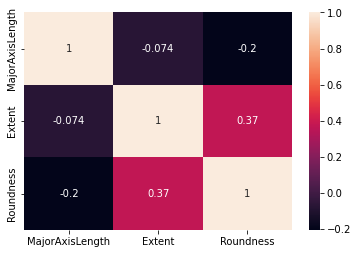

In [597]:
sns.heatmap(df_optimise.corr(), annot=True)

<b>Observations</b>

- Very little correlation between features - what we want

In [598]:
# standardise the data
scaler = StandardScaler().fit_transform(df_optimise)

In [599]:
X = scaler # features are 'MajorAxisLength', Extent, 'Roundess'
y = df['Class'] # target

In [600]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [601]:
lr_model_optmise = LogisticRegression().fit(X_train, y_train)

In [602]:
print('New LR test score: ', lr_model_optmise.score(X_test, y_test))
print('New LR train score: ', lr_model_optmise.score(X_train, y_train))


New LR test score:  0.9796535606268902
New LR train score:  0.9771789936761067


<b>Observations</b>

- Both scores are close which suggests no overfitting
- Very little difference between previous logistic regressions score
- Model is simpler

In [603]:
lr_model_optmise.coef_

array([[-3.08685288, -0.01893421, -6.89668902]])

In [604]:
# predict test class
lr_y_pred_optmise = lr_model_optmise.predict(X_test)

# predicted test probability:
lr_y_pred_probs_optimise = lr_model_optmise.predict_proba(X_test)

In [605]:
lr_y_pred_optmise

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [606]:
lr_y_pred_probs_optimise

array([[9.98109487e-01, 1.89051321e-03],
       [7.02600282e-01, 2.97399718e-01],
       [2.29067088e-03, 9.97709329e-01],
       ...,
       [9.99415729e-01, 5.84271433e-04],
       [4.60931539e-03, 9.95390685e-01],
       [5.58362495e-04, 9.99441638e-01]])

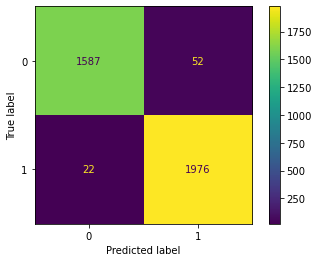

In [607]:
c_matrix = metrics.confusion_matrix(y_test, lr_y_pred_optmise)
c_matrix_t = pd.DataFrame(c_matrix)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()

In [608]:
print(metrics.classification_report(y_test, lr_y_pred_optmise))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1639
           1       0.97      0.99      0.98      1998

    accuracy                           0.98      3637
   macro avg       0.98      0.98      0.98      3637
weighted avg       0.98      0.98      0.98      3637



## Support Vector Machines

In [609]:
svm_model_optmise = svm.SVC(probability=True).fit(X_train, y_train)

In [610]:
print('New SVM test score: ', svm_model_optmise.score(X_test, y_test))
print('New SVM train score: ', svm_model_optmise.score(X_train, y_train))


New SVM test score:  0.9837778388781964
New SVM train score:  0.9799285125103107


In [611]:
svm_y_pred_optimise = svm_model_optmise.predict(X_test)

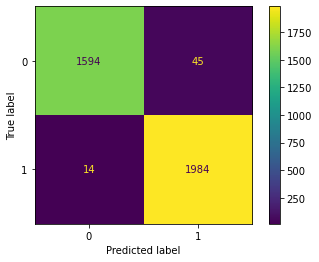

In [612]:
c_matrix = metrics.confusion_matrix(y_test, svm_y_pred_optimise)
c_matrix_t = pd.DataFrame(c_matrix)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()

In [613]:
print(metrics.classification_report(y_test, svm_y_pred_optimise))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1639
           1       0.98      0.99      0.99      1998

    accuracy                           0.98      3637
   macro avg       0.98      0.98      0.98      3637
weighted avg       0.98      0.98      0.98      3637



## Naive-Bayes

In [614]:
nb_model_optmise = GaussianNB().fit(X_train, y_train)

In [615]:
print('New Naive-Bayes test score: ', nb_model_optmise.score(X_test, y_test))
print('New Naive-Bayes trainiscore: ', nb_model_optmise.score(X_train, y_train))

New Naive-Bayes test score:  0.9705801484740171
New Naive-Bayes trainiscore:  0.9654935386307396


In [616]:
nb_y_pred_optimise = nb_model_optmise.predict(X_test)

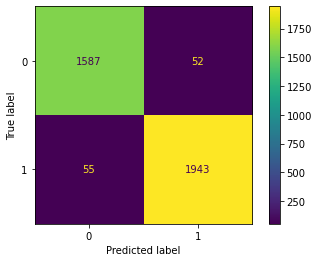

In [617]:
c_matrix = metrics.confusion_matrix(y_test, nb_y_pred_optimise)
c_matrix_t = pd.DataFrame(c_matrix)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()

In [618]:
print(metrics.classification_report(y_test, nb_y_pred_optimise))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1639
           1       0.97      0.97      0.97      1998

    accuracy                           0.97      3637
   macro avg       0.97      0.97      0.97      3637
weighted avg       0.97      0.97      0.97      3637



## Grid Search

In [619]:
lr_params = {
    'penalty': ['l2'],
    'C':  [0.01, 0.1, 1.0,],
    'solver':  [ 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg']
}

lr_gs_optimise = GridSearchCV(LogisticRegression(max_iter=10000), lr_params, cv=5, verbose=1)
lr_gs_optimise.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.01, 0.1, 1.0], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga',
                                    'newton-cg']},
             verbose=1)

In [620]:
best_lr_gs = lr_gs_optimise.best_estimator_
print(lr_gs_optimise.best_params_)
print(lr_gs_optimise.best_score_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.9774537606362055


In [621]:
svm_params = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.001, 0.0001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svm_gs_optimise = GridSearchCV(svm.SVC(max_iter=10000000), svm_params, cv=5, verbose=1)
svm_gs_optimise.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=SVC(max_iter=10000000),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [622]:
best_svm = svm_gs_optimise.best_estimator_
print(svm_gs_optimise.best_params_)
print(svm_gs_optimise.best_score_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.9801346691568646


In [623]:
# get probability for each model
lr_proba = lr_model_optmise.predict_proba(X_test)[:,1]
svm_proba = svm_model_optmise.predict_proba(X_test)[:,1]
nb_proba = nb_model_optmise.predict_proba(X_test)[:,1]

# calculate fpr and tpr for each model
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test, lr_proba)
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, svm_proba)
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test, nb_proba)

# calculate roc curve for each model
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)

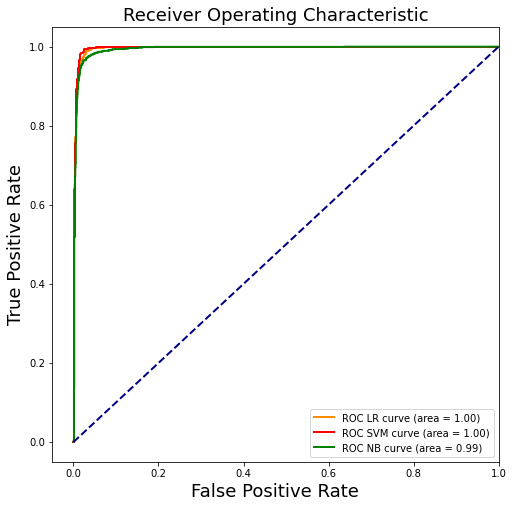

In [624]:
# set figure size
plt.figure(figsize=[8,8])

# plot each of the models
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw = 2, label = 'ROC LR curve (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, color='r', lw = 2, label = 'ROC SVM curve (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_nb, tpr_nb, color='g', lw = 2, label = 'ROC NB curve (area = %0.2f)' % roc_auc_nb)

plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic', fontsize=18)
plt.legend(loc="lower right")
plt.show()